# Airbnb Data Discovery

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')

## Loading the data
##### *Note: This is not a naive load of the data.  i.e. `pd.read_csv()`, and the print statements in the following cell were ran before `pd.read_csv()` was updated with the current parameters.

In [14]:
train_df = pd.read_csv('train_users_2.csv',
                       #index_col='id',
                       dtype={
                           'id':str,
                           'gender':'category',
                           'age':np.float64,
                           'signup_method':'category',
                           'signup_flow':'category',
                           'language':'category',
                           'affiliate_channel':'category',
                           'affiliate_provider':'category',
                           'first_affiliate_tracked':'category',
                           'signup_app':'category',
                           'first_device_type':'category',
                           'first_browser':'category',
                           'country_destination':'category'
                       },
                       na_values={
                           'gender':'-unknown-',
                           'first_affiliate_tracked':'untracked',
                           'country_destination':'NDF',
                           'first_browser':'-unkown-',
                           'first_device_type':['Desktop (Other)', 'SmartPhone (Other)', 'Other/Unknown']
                       },
                       verbose=True,
                       parse_dates=['date_account_created',
                                    'timestamp_first_active',
                                    'date_first_booking'],
                       infer_datetime_format=True)
train_df.head()

Tokenization took: 26.44 ms
Type conversion took: 54.44 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 20.78 ms
Type conversion took: 51.20 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 20.49 ms
Type conversion took: 48.19 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 19.33 ms
Type conversion took: 47.55 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 18.84 ms
Type conversion took: 48.70 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 21.50 ms
Type conversion took: 52.98 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 10.07 ms
Type conversion took: 26.05 ms
Parser memory cleanup took: 0.01 ms


id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

   gender   age signup_method signup_flow language affiliate_channel  \
0     NaN   NaN      facebook           0       en            direct   
1    MALE  38.0      facebook           0       en               seo   
2  FEMALE  56.0         basic           3       en            direct   
3  FEMALE  42.0      facebook           0       en            direct   
4     NaN  41.0         basic           0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct                     NaN        Web       Mac Desktop   
1             google                     NaN        Web       Mac Desktop   
2             direct                     NaN        Web   Windows Desktop   
3             direct                     NaN        Web       Mac Desktop   
4             direct                     NaN        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NaN  
1        Chrome                 NaN  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [15]:
train_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked    115297
signup_app                      0
first_device_type           11942
first_browser                   0
country_destination        124543
dtype: int64

In [16]:
train_df.loc[train_df['country_destination'].isnull(), 'date_first_booking'].isnull().sum()

124543

### The preceding two cells indicate that 124,543 people in the training set haven't booked a trip yet.  This is interesting for future evaluation.

In [17]:
train_df = pd.read_csv('train_users_2.csv',
                       #index_col='id',
                       dtype={
                           'id':str,
                           'gender':'category',
                           'age':np.float64,
                           'signup_method':'category',
                           'signup_flow':'category',
                           'language':'category',
                           'affiliate_channel':'category',
                           'affiliate_provider':'category',
                           'first_affiliate_tracked':'category',
                           'signup_app':'category',
                           'first_device_type':'category',
                           'first_browser':'category',
                           'country_destination':'category'
                       },
                       na_values={
                           'gender':'-unknown-',
                           'first_affiliate_tracked':'untracked',
                           'first_browser':'-unkown-',
                           'first_device_type':['Desktop (Other)', 'SmartPhone (Other)', 'Other/Unknown']
                       },
                       verbose=True,
                       parse_dates=['date_account_created',
                                    'timestamp_first_active',
                                    'date_first_booking'],
                       infer_datetime_format=True)

Tokenization took: 32.38 ms
Type conversion took: 49.00 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 24.36 ms
Type conversion took: 48.83 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 18.54 ms
Type conversion took: 48.91 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 18.16 ms
Type conversion took: 48.10 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 19.91 ms
Type conversion took: 54.83 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 17.82 ms
Type conversion took: 46.66 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 10.13 ms
Type conversion took: 25.83 ms
Parser memory cleanup took: 0.00 ms


In [18]:
train_df.loc[train_df['country_destination'].isnull(), 'date_first_booking'].isnull().sum()

0

In [3]:
train_df.dropna(axis='index', subset=['country_destination'], inplace=True)

In [19]:
train_df['country_destination'].loc[train_df['country_destination'] != 'US'].value_counts().sum()

151075

In [20]:
print(train_df.gender.unique())
print(train_df.age.unique())
print(train_df.signup_method.unique())
print(train_df.signup_flow.unique())
print(train_df.language.unique())
print(train_df.affiliate_channel.unique())
print(train_df.affiliate_provider.unique())
print(train_df.first_affiliate_tracked.unique())
print(train_df.signup_app.unique())
print(train_df.first_device_type.unique())
print(train_df.first_browser.unique())
print(train_df.country_destination.unique())

[NaN, MALE, FEMALE, OTHER]
Categories (3, object): [MALE, FEMALE, OTHER]
[      nan 3.800e+01 5.600e+01 4.200e+01 4.100e+01 4.600e+01 4.700e+01
 5.000e+01 3.600e+01 3.700e+01 3.300e+01 3.100e+01 2.900e+01 3.000e+01
 4.000e+01 2.600e+01 3.200e+01 3.500e+01 5.900e+01 4.900e+01 4.400e+01
 3.400e+01 2.800e+01 1.900e+01 5.300e+01 5.200e+01 3.900e+01 5.700e+01
 2.500e+01 5.400e+01 6.900e+01 6.300e+01 4.300e+01 5.500e+01 6.500e+01
 5.800e+01 6.100e+01 1.800e+01 5.000e+00 2.700e+01 4.500e+01 6.000e+01
 4.800e+01 5.100e+01 6.400e+01 7.200e+01 7.000e+01 6.700e+01 7.300e+01
 2.014e+03 1.040e+02 6.600e+01 1.050e+02 6.800e+01 9.500e+01 2.400e+01
 9.400e+01 7.500e+01 7.900e+01 6.200e+01 2.013e+03 1.600e+01 4.000e+00
 2.300e+01 1.010e+02 9.800e+01 7.600e+01 7.400e+01 8.700e+01 9.200e+01
 1.150e+02 7.100e+01 8.400e+01 1.070e+02 7.800e+01 9.900e+01 1.100e+02
 1.020e+02 8.200e+01 7.700e+01 2.200e+01 8.900e+01 2.100e+01 1.500e+01
 2.000e+01 1.030e+02 2.000e+00 1.700e+01 8.600e+01 9.700e+01 8.100e+01
 9.0

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     117763 non-null category
age                        125461 non-null float64
signup_method              213451 non-null category
signup_flow                213451 non-null category
language                   213451 non-null category
affiliate_channel          213451 non-null category
affiliate_provider         213451 non-null category
first_affiliate_tracked    98154 non-null category
signup_app                 213451 non-null category
first_device_type          201509 non-null category
first_browser              213451 non-null category
country_destination        213451 non-null category
dtypes: category(11), datetime64[ns](3), flo

## Observing the unique values we find & .info:
#### <u/>Gender column</u>: There are three unique values for this column besides `'NaN'`: `'male'`, `'female'`, and `'other'`.  We will keep `'other'` unique from `'NaN'` because some individuals do not identify with binary gender categories.  This column is between 1/2 and 2/3 null!!
#### <u/>Age column</u> : this column will remain a float until cleansed, at which time data abnormalities will be explored.  Note: this column is approximately half null values.
#### <u/>Signup Method column</u>: only two remarks here: (1) the lack of `'NaN'` values indicate that this column is complete, and (2) there are only three unique values.
#### <u/>Signup Flow column</u>: the page that lead the user to the signup page.  It is only 17 integers, so I'll leave them as categories for now.  Note that there is a value 0 here.  It might be possible that this represents the homepage, or users that came straight to the login page especially since there were no null values for this column.  We will explore this more later.
#### <u/>Language column</u>: The language preference of the user.  There are 25 of these!  This seems like a lot considering all the IP addresses are based in the US.  Is the US truly a great "melting pot", or is it possible that Also, note that there are no null entries for this column.
#### <u/>Affiliate Channel column</u>: The 8 strings that describe the type of paid marketing that lead the user to Airbnb.  Any sale can be attributed to some form of marketing, hence the decision to keep the `'other'` value instead of `'NaN'`.
#### 

In [22]:
print(train_df.signup_flow.value_counts())

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64


In [23]:
print(train_df.affiliate_channel.value_counts())

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64


In [24]:
print(train_df.affiliate_provider.value_counts())

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64


### Drop rows for users over 100 yrs old

In [28]:
train_df.drop(train_df['age'].loc[train_df['age'] > 100].index, axis=0, inplace=True)

#### However, there are a couple oddities: (1) there are a large number of people over the age of 100, 

In [ ]:
train_df.loc[train_df.age > 2000, 'age'].value_counts()

In [ ]:
train_df.loc[train_df.age == 2008.0,
             'date_account_created']

In [ ]:
train_df['age_mistakes'] = train_df.loc[train_df.age > 2000, 'age'] = 1

In [ ]:
train_df.loc[train_df.age > 2000, 'age'].value_counts()

In [ ]:
train_df.age[train_df.age > 90.0]

In [ ]:
train_df['age_pranks'] = train_df.loc[train_df.age > 2000, 'age'] = 1

## Preparing the data

### Convert age column to integers

In [25]:
train_df['age'] = train_df['age'].loc[train_df['age'] != np.NaN].fillna(-1).astype(np.int32)

In [29]:
train_df['age'].value_counts()

-1      87990
 30      6124
 31      6016
 29      5963
 28      5939
 32      5855
 27      5738
 33      5527
 26      5044
 34      5029
 35      4860
 25      4459
 36      4083
 37      3694
 38      3384
 24      3220
 39      2998
 40      2766
 41      2538
 23      2462
 42      2243
 45      2149
 44      2137
 43      2056
 46      1875
 22      1702
 47      1646
 48      1469
 50      1387
 51      1337
        ...  
 17        67
 78        50
 79        50
 95        49
 80        46
 5         45
 87        31
 81        30
 86        27
 16        26
 82        26
 85        26
 100       26
 96        25
 83        25
 84        20
 90        18
 93        18
 99        17
 98        15
 92        14
 89        13
 88        12
 91        12
 94        12
 97        10
 15         8
 2          7
 4          3
 1          2
Name: age, Length: 91, dtype: int64

In [30]:
for column in train_df.columns[4:]:
    print(train_df[column].value_counts())

FEMALE    62093
MALE      53750
OTHER       279
Name: gender, dtype: int64
-1      87990
 30      6124
 31      6016
 29      5963
 28      5939
 32      5855
 27      5738
 33      5527
 26      5044
 34      5029
 35      4860
 25      4459
 36      4083
 37      3694
 38      3384
 24      3220
 39      2998
 40      2766
 41      2538
 23      2462
 42      2243
 45      2149
 44      2137
 43      2056
 46      1875
 22      1702
 47      1646
 48      1469
 50      1387
 51      1337
        ...  
 17        67
 78        50
 79        50
 95        49
 80        46
 5         45
 87        31
 81        30
 86        27
 16        26
 82        26
 85        26
 100       26
 96        25
 83        25
 84        20
 90        18
 93        18
 99        17
 98        15
 92        14
 89        13
 88        12
 91        12
 94        12
 97        10
 15         8
 2          7
 4          3
 1          2
Name: age, Length: 91, dtype: int64
basic       151060
facebook     595

In [60]:
%config InlineBackend.figure_format = 'retina'

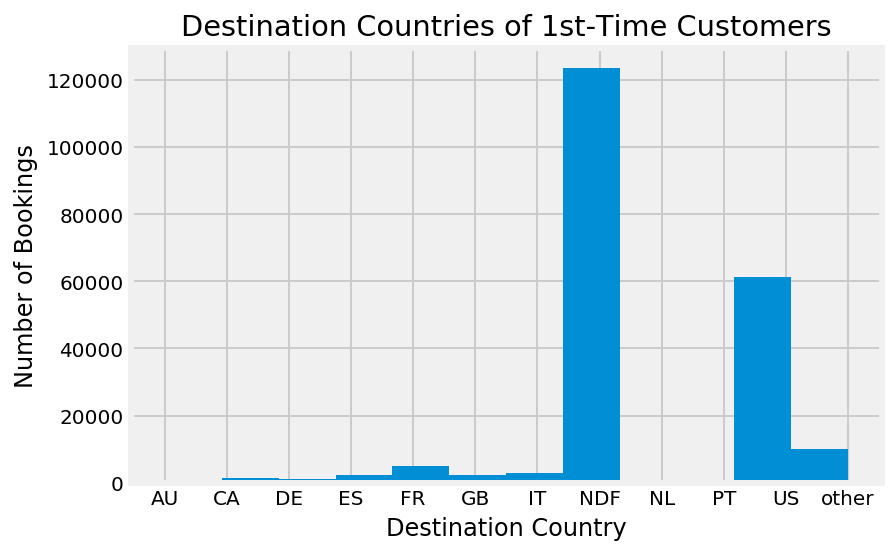

In [61]:
plt.hist(train_df['country_destination'], bins=12, histtype='bar')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.show()

In [58]:
plt.hist(train_df['country_destination'].loc[train_df['country_destination'].all('US', 'NDF')],
                                             histtype='bar', align='mid')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.show()

TypeError: Categorical cannot perform the operation all

In [ ]:
train_df['first_device_type'].value_counts()

In [ ]:
plt.hist(train_df['first_device_type'], bins=9, histtype='bar')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.xticks(rotation='25')
plt.ticklabel_format()
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
train_sets = [('X_train{0}'.format(i), 'Y_train{0}'.format(i)) for i in np.arange(10)]
test_sets = [('X_train{0}'.format(i), 'Y_train{0}'.format(i)) for i in np.arange(10)]

In [9]:
train_df_dummies = pd.get_dummies(train_df.loc[:,'gender':'first_browser'], drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df_dummies,
    train_df['country_destination'], test_size=0.3, random_state=1,
    stratify=train_df['country_destination'])

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0, cache_size=20000)
svm.fit(X_train, y_train)

SVC(C=10.0, cache_size=20000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [12]:
svm.score(X_test, y_test)

0.7010085104787613

In [15]:
y_pred = svm.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score

In [16]:
confusing_matrix = confusion_matrix(y_test, y_pred)

In [22]:
confusion_df = pd.DataFrame(confusing_matrix, index=svm.classes_, columns=svm.classes_)

In [24]:
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'

In [25]:
confusion_df

Predicted  AU  CA  DE  ES  FR  GB  IT  NL  PT     US  other
Actual                                                     
AU          0   0   0   0   0   0   0   0   0    162      0
CA          0   0   0   0   0   0   0   0   0    427      1
DE          0   0   0   0   0   0   0   0   0    318      0
ES          0   0   0   0   0   0   0   0   0    675      0
FR          0   0   1   0   0   0   0   0   0   1505      1
GB          0   0   0   0   0   0   0   0   0    697      0
IT          0   0   0   1   0   0   0   0   0    848      2
NL          0   0   0   0   0   0   0   0   0    228      1
PT          0   0   0   0   0   0   0   0   0     65      0
US          0   0   0   0   1   0   3   0   0  18688     21
other       0   0   0   0   0   0   0   0   0   3018     10

In [19]:
f1 = f1_score(y_test, y_pred, average='micro')

In [20]:
f1

0.7010085104787613

In [63]:
26,631.    26,673  99.84% predicted US  70.06% actually US

{'C': 10.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
svm.decision_function(X_test)

array([[ 2.89714247,  3.9474529 ,  1.87857116, ..., -0.25627858,
        10.28999908,  9.22968261],
       [ 0.80540801,  2.8953582 ,  5.0216978 , ..., -0.27727497,
        10.25235827,  9.2042711 ],
       [ 2.93052088,  1.89717389,  3.88918412, ..., -0.24239243,
        10.25344097,  9.2035167 ],
       ...,
       [ 0.76980739,  2.95547496,  4.01488806, ..., -0.34304982,
        10.27040109,  9.20535316],
       [ 1.84907403,  3.90133005,  2.85675396, ..., -0.33834142,
        10.26154103,  9.21733146],
       [ 0.79945164,  3.993595  ,  1.85326915, ..., -0.2725104 ,
        10.25366218,  9.20427888]])

In [65]:
svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
svm.n_support_

array([  377,  1000,   743,  1574,  3516,  1627,  1984,   533,   152,
       23419,  7066], dtype=int32)

In [67]:
svm.dual_coef_

array([[ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -5.7695734 ],
       ...,
       [  0.        ,   0.37541613,   4.76879723, ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
        -10.        , -10.        ]])

In [68]:
svm.class_weight_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
svm.classes_

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US',
       'other'], dtype=object)